In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

In [2]:
iris = pd.read_csv("./iris.csv")
iris.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [3]:
#view information of iris.csv
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal.length    150 non-null float64
sepal.width     150 non-null float64
petal.length    150 non-null float64
petal.width     150 non-null float64
variety         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
#data processing データを加工
setosa = iris[iris["variety"] == "Setosa"]
setosa.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [5]:
versicolor = iris[iris["variety"] == "Versicolor"]
versicolor.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor


In [6]:
virginica = iris[iris["variety"] == "Virginica"]
virginica.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
100,6.3,3.3,6.0,2.5,Virginica
101,5.8,2.7,5.1,1.9,Virginica
102,7.1,3.0,5.9,2.1,Virginica


In [7]:
setosa.sum() #summary 合計値

sepal.length                                                250.3
sepal.width                                                 171.4
petal.length                                                 73.1
petal.width                                                  12.3
variety         SetosaSetosaSetosaSetosaSetosaSetosaSetosaSeto...
dtype: object

In [8]:
setosa.mean() #avarage 平均値

sepal.length    5.006
sepal.width     3.428
petal.length    1.462
petal.width     0.246
dtype: float64

In [9]:
setosa.median() #central 中央値

sepal.length    5.0
sepal.width     3.4
petal.length    1.5
petal.width     0.2
dtype: float64

In [10]:
setosa.min() #minimum 最小値

sepal.length       4.3
sepal.width        2.3
petal.length         1
petal.width        0.1
variety         Setosa
dtype: object

In [11]:
setosa.max() #maximum 最大値

sepal.length       5.8
sepal.width        4.4
petal.length       1.9
petal.width        0.6
variety         Setosa
dtype: object

In [12]:
setosa.corr() #correation coefficient 相関係数

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,0.742547,0.267176,0.278098
sepal.width,0.742547,1.000000,0.177700,0.232752
petal.length,0.267176,0.177700,1.000000,0.331630
petal.width,0.278098,0.232752,0.331630,1.000000


In [13]:
setosa.var() #dispersion 分散

sepal.length    0.124249
sepal.width     0.143690
petal.length    0.030159
petal.width     0.011106
dtype: float64

In [14]:
setosa.std() #standard deviation 標準偏差

sepal.length    0.352490
sepal.width     0.379064
petal.length    0.173664
petal.width     0.105386
dtype: float64

In [15]:
setosa.cov() #covariance 共分散

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,0.124249,0.099216,0.016355,0.010331
sepal.width,0.099216,0.143690,0.011698,0.009298
petal.length,0.016355,0.011698,0.030159,0.006069
petal.width,0.010331,0.009298,0.006069,0.011106


In [16]:
iris.groupby("variety").mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


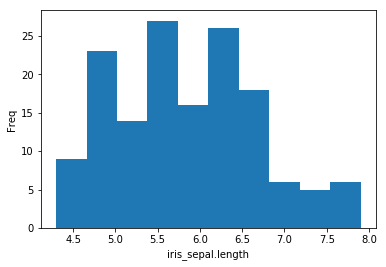

In [19]:
#irisについてsepal.lengthのヒストグラムを描く
plt.figure()
plt.hist(iris["sepal.length"])
plt.xlabel("iris_sepal.length")
plt.ylabel("Freq")
plt.show()

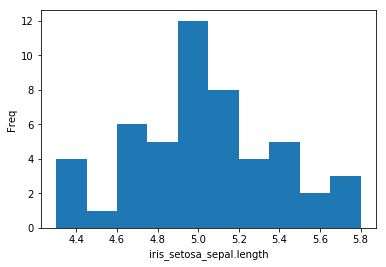

In [18]:
#irisのうち、setosaについてsepal.lengthのヒストグラムを描く
plt.figure()
plt.hist(setosa["sepal.length"])
plt.xlabel("iris_setosa_sepal.length")
plt.ylabel("Freq")
plt.show()

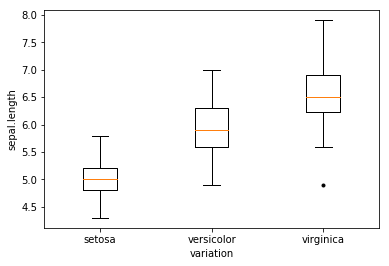

In [20]:
#irisについて箱ひげ図を描く
data = [setosa["sepal.length"], versicolor["sepal.length"], virginica["sepal.length"]]
plt.figure()
plt.boxplot(data, sym="k.")
plt.xlabel("variation")
plt.ylabel("sepal.length")
ax = plt.gca()
plt.setp(ax, xticklabels=["setosa", "versicolor", "virginica"])
plt.show()

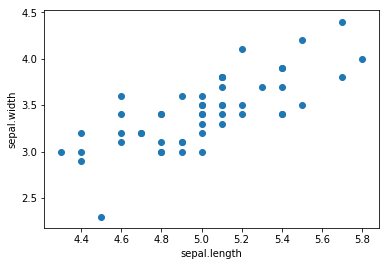

In [21]:
#散布図
plt.scatter(setosa["sepal.length"], setosa["sepal.width"])
plt.xlabel("sepal.length")
plt.ylabel("sepal.width")
plt.show()

In [22]:
#相関係数
corr = np.corrcoef(setosa["sepal.length"], setosa["sepal.width"])
print(corr[0, 1])

0.742546685665


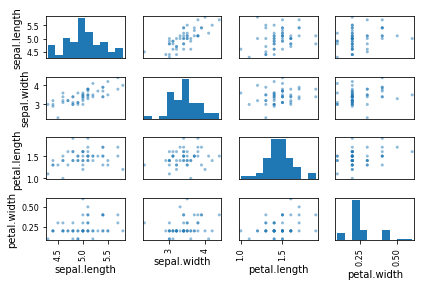

In [25]:
#散布図行列
from pandas.plotting import scatter_matrix
scatter_matrix(setosa)
plt.tight_layout()
plt.show()

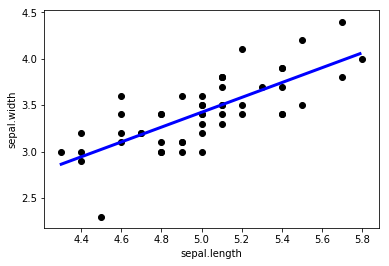

回帰係数 [[ 0.7985283]]
切片 [-0.56943267]
決定係数 0.551375580392


In [28]:
#単回帰分析
from sklearn import linear_model
LinerRegr = linear_model.LinearRegression()
X = setosa[["sepal.length"]]
Y = setosa[["sepal.width"]]
LinerRegr.fit(X, Y)

plt.scatter(X, Y, color="black")
px = np.arange(X.min(), X.max(), .01)[:,np.newaxis]
py = LinerRegr.predict(px)
plt.plot(px, py, color="blue", linewidth=3)
plt.xlabel("sepal.length")
plt.ylabel("sepal.width")
plt.show()

print("回帰係数", LinerRegr.coef_)
print("切片", LinerRegr.intercept_)
print("決定係数", LinerRegr.score(X, Y))

In [29]:
#重回帰分析
from sklearn import linear_model
LinerRegr = linear_model.LinearRegression()
X = setosa[["sepal.length", "petal.length", "petal.width"]]
Y = setosa[["sepal.width"]]
LinerRegr.fit(X, Y)
LinerRegr.score(X, Y)

0.55303821509914219

In [31]:
#ダミー変数をつくる
dummies = pd.get_dummies(iris["variety"])
iris = pd.concat([iris, dummies], axis=1)
iris.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety,Setosa,Versicolor,Virginica
0,5.1,3.5,1.4,0.2,Setosa,1,0,0
1,4.9,3.0,1.4,0.2,Setosa,1,0,0
2,4.7,3.2,1.3,0.2,Setosa,1,0,0


In [35]:
#ダミー変数ベースで回帰係数と切片を求める
LinerRegr = linear_model.LinearRegression()
X = iris[["Virginica", "Versicolor"]]
Y = iris[["sepal.length"]]
LinerRegr.fit(X, Y)
print("回帰係数", LinerRegr.coef_)
print("切片", LinerRegr.intercept_)

回帰係数 [[ 1.582  0.93 ]]
切片 [ 5.006]
